In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import nltk



C:\Users\20100\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\20100\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\20100\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
nltk.download("stopwords")
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20100\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv('merged.csv')
data = data[['title','body']]
data.sample(10)

,title,body
33929,بايرن ميونخ يتفوق على ريال مدريد رقميًا,لاعبو ريال مدريد\nأظهرت مجموعة من الأرقام والإ...
25392,مدرب إشبيلية يقلل من أهمية مواجهة فالنسيا,بابلو ماشين\nأكد بابلو ماشين، مدرب إشبيلية، ال...
5462,كيف تنتهي أزمة محمد صلاح مع الاتحاد المصري؟,محمد صلاح\nلا صوت يعلو فوق صوت أزمة الدولي الم...
34795,راخوي يهنئ نادال بلقب بطولة مونت كارلو,نادال\nهنأ رئيس الحكومة الإسبانية، ماريانو راخ...
28432,كورينثيانز وأتلتيكو مينيرو يضيقان الخناق على ف...,بات كورينثيانز، وأتلتيكو مينيرو، يلاحقان فلامن...
7153,الاتحاد التونسي يتكفل بمصاريف علاج بن عمر,من اجتماع وديع الجريء باللاعب امين بن عمر\nاصد...
14706,الشباب السعودي يقدم عرضًا للاعب لاتسيو,باستوس مع لاعبي لاتسيو\nبات مدافع لاتسيو خارج ...
33301,تقرير : رحيل إنييستا ينسف خطة إدارة برشلونة,إنييستا\nسيغادر برشلونة، مع نهاية الموسم الجار...
31396,مويس يعاقب أندي كارول,ديفيد مويس\nعاقب ديفيد مويس مدرب وست هام يوناي...
26739,أحمد حسن يشن هجوما لاذعا على عضو الاتحاد المصري,أحمد حسن\nشن أحمد حسن، المشرف على قطاع الكرة ب...


In [5]:
max(data['body'].str.len())

6735

In [6]:
# data[data['body'].str.len()==6735].body

In [7]:
data = data[~data['title'].str.contains('بالصور')]
data.shape                      

(36534, 2)

In [8]:
import re
import string

# #Removes non-alphabetic characters:
# def text_strip(column):
#     for row in column:
        
#         #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!
        
#         row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
#         row=re.sub("(\\r)", ' ', str(row)).lower() 
#         row=re.sub("(\\n)", ' ', str(row)).lower()
        
#         row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
#         row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
#         row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
#         row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
#         row=re.sub("(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively
        
#         row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
        
#         row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
#         row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
#         row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
#         row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
        
        
#         row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
#         row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
#         row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)
        
#         row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
#         #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
#         try:
#             url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
#             repl_url = url.group(3)
#             row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
#         except:
#             pass #there might be emails with no url in them
        

        
#         row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
#         #Should always be last
#         row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces

        
        
#         yield row
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)



def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text


def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)
       
def remove_stop_words(text):
    text = ' '.join([x for x in text.split(' ') if x not in arb_stopwords])
    return text

def clean_str(text):
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ']
    
    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(p_tashkeel,"", text)
    
    #remove longation
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)
    
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])
    
    #trim    
    text = text.strip()

    return text

In [9]:
cleaned_title = data['title'].apply(normalize_arabic)\
    .apply(remove_diacritics)\
        .apply(remove_punctuations)\
        .apply(remove_repeating_char)\
            .apply(clean_str)
                        # .apply(remove_stop_words)\
            
cleaned_body = data['body'].apply(normalize_arabic)\
    .apply(remove_diacritics)\
        .apply(remove_punctuations)\
            .apply(remove_repeating_char)\
                .apply(remove_stop_words)\
                .apply(clean_str)

In [10]:
cleaned_title

0                 حارس الارجنتين يغادر وديه اسبانيا لاصابه
2        مشاركه عواد والوجوه الجديده ابرز ملامح لقاء مص...
3         رءيس الوكره يستنجد بالجماهير قبل مواجه الخريطيات
6        العدواني في حوار ل اطمح في تدريب المنتخب الكوي...
7                 لاعب قطر الافضل في بطوله الصداقه الدوليه
                               ...                        
38661    تقرير ما مصير شكاوي الانديه السعوديه في البطول...
38662       زيدان كورتوا يءدي واجبه ولست قلقا من هذا الامر
38663              ريال مدريد يدرس حل مشكلته بلاعب يوفنتوس
38664               ثناءيه كين وسون تدخل تاريخ البريميرليج
38665             برونو يحي ذكريات اجويرو وكين ملك الهدايا
Name: title, Length: 36534, dtype: object

In [11]:
cleaned_title = ['_START_ '+ str(doc) + ' _END_' for doc in cleaned_title]


In [12]:
data['cleaned_title'] = cleaned_title
data['cleaned_body'] = cleaned_body

body_count = []
title_count = []

In [13]:
for sent in data['cleaned_body']:
    body_count.append(len(sent.split()))
for sent in data['cleaned_title']:
    title_count.append(len(sent.split()))

In [14]:
graph_df= pd.DataFrame()
graph_df['text']=body_count
graph_df['summary']=title_count

In [15]:
max(graph_df['text']),max(graph_df['summary'])


(942, 18)

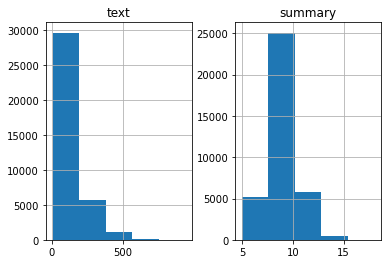

In [16]:
import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
plt.show()

In [17]:
#Check how much % of summary have 0-15 words
cnt=0
for i in data['cleaned_title']:
    if(len(i.split())<=13):
        cnt=cnt+1
print(cnt/len(data['cleaned_title']))

0.9960858378496743


In [18]:
#Check how much % of body have 0-70 words
cnt=0
for i in data['cleaned_body']:
    if(len(i.split())<=500):
        cnt=cnt+1
print(cnt/len(data['cleaned_body']))

0.9955931461104724


In [19]:
#Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len=500
max_summary_len=13

In [20]:
#Select the Summaries and Text between max len defined above

cleaned_text =np.array(data['cleaned_body'])
cleaned_summary=np.array(data['cleaned_title'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

In [21]:
post_pre.shape

(36236, 2)

In [22]:
max(post_pre['text'].str.len())
# max(post_pre['summary'])

3330

In [23]:
post_pre.head(2)


,text,summary
0,روميرو تعرض سيرجيو روميرو حارس مرمي منتخب الار...,_START_ حارس الارجنتين يغادر وديه اسبانيا لاصا...
1,المنتخب المصري حظيت مباراه المنتخب المصري امام...,_START_ مشاركه عواد والوجوه الجديده ابرز ملامح...


In [24]:
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [25]:
post_pre.head(2)


,text,summary
0,روميرو تعرض سيرجيو روميرو حارس مرمي منتخب الار...,sostok _START_ حارس الارجنتين يغادر وديه اسبان...
1,المنتخب المصري حظيت مباراه المنتخب المصري امام...,sostok _START_ مشاركه عواد والوجوه الجديده ابر...


In [26]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']),test_size=0.2,random_state=0,shuffle=True)

In [27]:
#Lets tokenize the text to get the vocab count , you can use Spacy here also

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

## RARE WORD ANALYSIS FOR X i.e 'text'

- tot_cnt gives the size of vocabulary (which means every unique words in the text)

- cnt gives me the no. of rare words whose count falls below threshold

- tot_cnt - cnt gives me the top most common words

In [28]:
sorted(x_tokenizer.word_counts.items(), key=lambda x:x[1], reverse=True)


[('علي', 77822),
 ('ان', 57573),
 ('الي', 34029),
 ('الفريق', 22340),
 ('امام', 17601),
 ('اليوم', 17211),
 ('الدوري', 16635),
 ('مباراه', 16342),
 ('المباراه', 14702),
 ('الموسم', 14551),
 ('خلال', 13891),
 ('انه', 11362),
 ('كاس', 11069),
 ('لاعب', 10522),
 ('وقال', 10443),
 ('المقبل', 9650),
 ('الاهلي', 9535),
 ('فريق', 9515),
 ('مدريد', 9428),
 ('نقطه', 9400),
 ('الاتحاد', 9314),
 ('المركز', 9209),
 ('الاول', 9040),
 ('النادي', 8893),
 ('الفوز', 8823),
 ('دوري', 8807),
 ('محمد', 8777),
 ('الجوله', 8476),
 ('الفني', 8453),
 ('واضاف', 8335),
 ('الثاني', 8238),
 ('القدم', 8207),
 ('الاعبين', 8142),
 ('الاعب', 7572),
 ('الماضي', 7487),
 ('البطوله', 7486),
 ('المنتخب', 7360),
 ('بطوله', 7311),
 ('برشلونه', 7258),
 ('المدرب', 7237),
 ('نادي', 6928),
 ('مدرب', 6792),
 ('وكان', 6692),
 ('فريقه', 6556),
 ('العالم', 6477),
 ('نهاءي', 6303),
 ('3', 6253),
 ('بشكل', 6111),
 ('مباريات', 6111),
 ('الاولي', 6064),
 ('لكره', 6043),
 ('حتي', 5988),
 ('ملعب', 5950),
 ('ابطال', 5912),
 ('عبد', 5880),

In [29]:
sorted(x_tokenizer.word_counts.items(), key=lambda x:x[1])


[('ضامنه', 1),
 ('كاهلنا', 1),
 ('بعقر', 1),
 ('زملكاويه', 1),
 ('لذكريات', 1),
 ('بالمتعمده', 1),
 ('واجده', 1),
 ('توبالوفيتش', 1),
 ('وباداءه', 1),
 ('يقارنون', 1),
 ('كسوه', 1),
 ('بكد', 1),
 ('وانتاج', 1),
 ('مقعديهما', 1),
 ('لتكن', 1),
 ('وكونوا', 1),
 ('تخذلونا', 1),
 ('ويحذر', 1),
 ('اليكساندروس', 1),
 ('ديميتريس', 1),
 ('جيانوليس', 1),
 ('بكنو', 1),
 ('باليسري', 1),
 ('نشهدها', 1),
 ('ليتي', 1),
 ('ابيانو', 1),
 ('تنقلاته', 1),
 ('بانتظاره', 1),
 ('الاولكان', 1),
 ('ويرضيني', 1),
 ('لحقهما', 1),
 ('وتحملهما', 1),
 ('والنطر', 1),
 ('والمجموع', 1),
 ('يعاديان', 1),
 ('فالصحف', 1),
 ('مراوغتنا', 1),
 ('مراوغتهم', 1),
 ('شاءك', 1),
 ('مفاوضاتنا', 1),
 ('جعبتنا', 1),
 ('ليتنازل', 1),
 ('حفلها', 1),
 ('اندماجها', 1),
 ('مصاحبا', 1),
 ('لينافسا', 1),
 ('لايزل', 1),
 ('توهجت', 1),
 ('بتوامه', 1),
 ('فالان', 1),
 ('سيءازرون', 1),
 ('اشبليه', 1),
 ('دايوفايسيو', 1),
 ('تسفويك', 1),
 ('اوندريه', 1),
 ('اوكيدجا', 1),
 ('سينتونزي', 1),
 ('ديلاين', 1),
 ('بايوت', 1),
 ('بتشكيلتنا', 1),
 ('

In [30]:
thresh=5

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 66.12946156421991
Total Coverage of rare words: 3.0885065133191203


In [31]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 39449


In [32]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [33]:
thresh=5

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 75.36432432432433
Total Coverage of rare words: 8.778551076650007


In [34]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 5698


In [35]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [36]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [40]:

import pickle

# saving
with open('xtokenizer.pickle', 'wb') as handle:
    pickle.dump(x_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('ytokenizer.pickle', 'wb') as handle:
    pickle.dump(y_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [37]:
# y = np.load('full_grams_cbow_100_wiki.mdl.trainables.syn1neg.npy')
weights= np.load('full_grams_cbow_100_wiki.mdl.wv.vectors.npy')
weights = weights[:39449,:]

In [73]:
# from keras import backend as K 
from tensorflow import keras

import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

# K.clear_session()

latent_dim = 200
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,
                     weights=[weights],
                    #  keras.initializers.Constant(),
                     trainable=True, mask_zero=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Size of vocabulary from the w2v model = 39449
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 500)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 500, 100)     3944900     ['input_2[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 500, 200),   240800      ['embedding_1[0][0]']            
                                 (None, 200),                                                     
                                 (None, 200)]                                                     
                                                

In [74]:

# model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy')
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)


In [75]:
history=model.fit([x_tr,y_tr[:,:-1]], 
                  y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:],
                  epochs=50,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]],
                  y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
227/227 [==============================] - 54s 187ms/step - loss: 4.2766 - val_loss: 3.7516
Epoch 2/50
227/227 [==============================] - 39s 173ms/step - loss: 3.7853 - val_loss: 3.5948
Epoch 3/50
227/227 [==============================] - 40s 174ms/step - loss: 3.6379 - val_loss: 3.5031
Epoch 4/50
227/227 [==============================] - 40s 176ms/step - loss: 3.5343 - val_loss: 3.4259
Epoch 5/50
227/227 [==============================] - 41s 179ms/step - loss: 3.4354 - val_loss: 3.3302
Epoch 6/50
227/227 [==============================] - 42s 184ms/step - loss: 3.3241 - val_loss: 3.2316
Epoch 7/50
227/227 [==============================] - 45s 199ms/step - loss: 3.2191 - val_loss: 3.1630
Epoch 8/50
227/227 [==============================] - 43s 191ms/step - loss: 3.1266 - val_loss: 3.0871
Epoch 9/50
227/227 [==============================] - 42s 187ms/step - loss: 3.0443 - val_loss: 3.0312
Epoch 10/50
227/227 [==============================] - 42s 184ms/step - l

In [ ]:
# model.save('e2.h5')

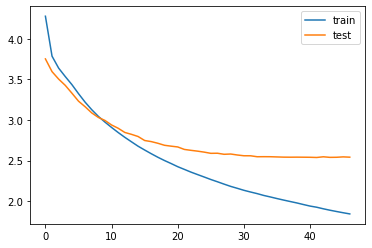

In [76]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [77]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [78]:
[1]+[2,3,4]

[1, 2, 3, 4]

In [79]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

## decoder_inputs = Input(shape=(None,))

# Final decoder model

## what is decoder_hidden_state_input here ????

decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [80]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        
        
    
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token

        # why [0,-1,:] ??
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [81]:
def seq2summary(input_seq):
    # breakpoint()
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [88]:
for i in range(0,5):
    print("Review:",seq2text(x_tr[i]))
    
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: ارثر ماسواكو يري ارثر ماسواكو مدافع وست هام يونايتد ان فريقه يتجاوز مرحله الخطر مشيرا الي ان الفوز علي ستوك سيتي سيعز بشكل كبير فرص بقاء الهامرز الدوري الانجليزي المتاز لكره القدم الفوز المباراه ستقام الاثنين لندن الفرصه لوست هام يونايتد يحتل المركز ال15 برصيد 34 نقطه ليقترب الوصول الي 40 نقطه وهي الحصيله عاده تكون لعدم الهبوط وقال ماسواكو لموقع النادي علي الانترنت نشعر بانا تجاوزنا مرحله الخطر الفوز علي ستوك سيتي سيوفر دفعه قويه لان الفريق سيكون حينها متقدما بفارق نقاط منطقه الخطر وخسر ستوك سيتي اخر اربع مباريات الدوري ليحتل المركز الاخير الترتيب برصيد 27 نقطه ويعتقد ماسواكو ان فريقه يمكنه استغلال وضع منافسه يقاتل اجل العوده لطريق الانتصارات وسيخوض وست هام المباراه مفعما بقدر كبير الثقه الفوز 3صفر علي ساوثهامبتون التعادل 1 امام حامل القب تشيلسي اخر مباراتين الدوري واضاف ماسواكو ستكون فرصه سانحه لان ستوك يتاخر عنا الترتيب وسيضمن الفوز توسيع الفارق بينا الي نقاط لصالحنا واكمل اذا خضنا المباراه بالطريقه نفسها واجهنا ساوثهامبتون وتشيلسي فاعتقد انا سنفوز واختم علينا فعله ان نلعب با

In [83]:
for i in range(25,30):
    print("Review:",seq2text(x_val[i]))
    print("Original summary:",seq2summary(y_val[i]))
    print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_text_len)))
    print("\n")

Review: توتي اعرب فرانشيسكو توتي اسطوره نادي روما ثقته بان فريقه السابق سيقدم اداء كبيرا امام برشلونه ربع نهاءي دوري الابطال رغم اعترافه بان البارسا احد اقوي الفرق اوروبا ويواجه روما الفريق الكتالوني علي ملعب كامب نو يوم 4 ابريل المقبل مباراه الذهاب علي ان يقام الاياب بملعب الاولمبيكو يوم 10 الشهر ذاته وقال فرانشيسكو لشبكه بريميوم سبورت الايطاليه انا سعيد لانا اقوي 8 انديه اوروبا ومواجه اي فريق منهم ستكون صعبه لذا علينا ان ندخل لهذه المواجه وهدوء نعلم ان برشلونه اقوي الفرق اوروبا لكنا نعلم انا نستطيع تقديم اداء جيد واردف علي الورق فانا كنا نتمني مواجه اشبيليه وليفربول الامر فعلي ارضيه الميدان تكون الامور مختلفه انهم ايضا سيكونون حذرين مواجه روما نريد لعب كره القدم الخاصه امام برشلونه حتي وان الجميع يتوقع تاهل الفريق الاسباني واستدرك لكنا نري روما ميزا المتع كره القدم ان تلعب المباريات اذا كنت تريد الفوز والاستمرار البطوله فعليك ان تكون جاهزا لعب امام افضل الفرق واتم مواجه لاعبين ميسي وسواريز سيكون حافزا كبيرا وسيكون علي برشلونه ان يتغلب علي روما 
Original summary: start توتي علي برشلون

# Testing samples out of dataset

In [1]:
test_from_filgoal = '''شارك أحمد سيد "زيزو"، لاعب الزمالك ومنتخب مصر، في مران فريقه الأول، اليوم الأربعاء بالدار البيضاء، بعد شفائه من فيروس كورونا المستجد.

وكان زيزو، قد غاب عن مباراة فريقه الماضية أمام ساجرادا الأنجولي، بسبب إصابته بفيروس كورونا، قبل أن يخضع لمسحة طبية الإثنين الماضي، أثبتت سلبيتها.

وخاض الزمالك مرانه الأول بالمغرب بملعب كهرماء، بعد وصوله للدار البيضاء ظهر اليوم الأربعاء، استعدادا لمواجهة الوداد المغربي بدوري أبطال أفريقيا.

وحرص أحمد مرتضى، عضو مجلس إدارة نادي الزمالك ورئيس بعثة الفريق في المغرب، على الشد من أزر اللاعبين قبل تدريب اليوم.

كما حضر أعضاء مجلس الإدارة المرافقين للبعثة، على حضور التدريب لمؤازرة الفريق قبل مواجهه الوداد المغربي وهم اللواء مصطفى هدهود نائب رئيس النادي واللواء علاء مقلد وجمال عبد الحميد وأحمد دعبس، أعضاء المجلس.

ويستعد الزمالك لمواجهة الوداد المغربي في الجولة الثالثة من دور المجموعات بدوري أبطال أفريقيا والمقررة السبت المقبل، بملعب محمد الخامس في الدار البيضاء.'''

def preprocessing(text):
    text = normalize_arabic(text)
    text = remove_diacritics(text)
    text = remove_punctuations(text)
    text = remove_repeating_char(text)
    text = remove_stop_words(text)
    text = clean_str(text)

    return text
preprocessed = preprocessing(test_from_filgoal)
test_seq  =   x_tokenizer.texts_to_sequences([preprocessed]) 
final_test_seq = pad_sequences(test_seq,  maxlen=max_text_len, padding='post')
print(final_test_seq.shape)
final_test_seq= final_test_seq[0]
print(final_test_seq.shape)
print("Review:",seq2text(final_test_seq))
# print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(final_test_seq.reshape(1,max_text_len)))
print("\n")





NameError: name 'normalize_arabic' is not defined

In [94]:
model.save('seq2seq_50epoch.h5')
encoder_model.save('encoder_model.h5')
decoder_model.save('decoder_model.h5')
